## Linear Binary Classifier를 디자인하여 Logical OR 연산 출력

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])



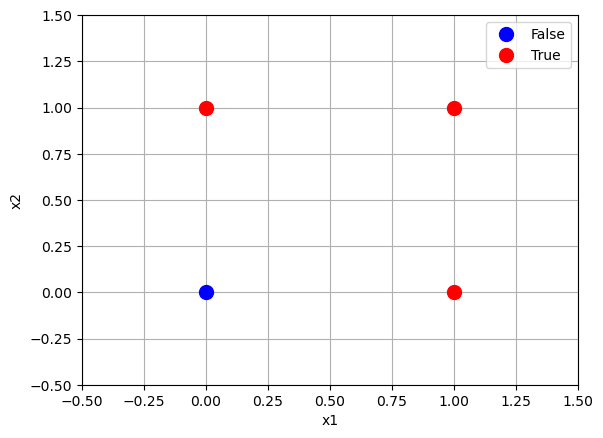

In [23]:
plt.plot(X[0, 0], X[0, 1], 'b.', markersize=20, label = "False")
plt.plot(X[1:, 0], X[1:, 1], 'r.', markersize=20, label = "True")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()

### Linear classifier with ADALINE

In [24]:
def linear_binary_classifier(x, theta):
    z = x.dot(theta)
    z = z
    y_hat = (z >= 0.5).astype(int)
    return y_hat

### Loss function(MSE)

In [25]:
def MSE(y_hat, y):
    return np.mean((y_hat - y)**2)

### bias 

In [26]:
X_ = np.c_[np.ones(X.shape[0]), X]
X_

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

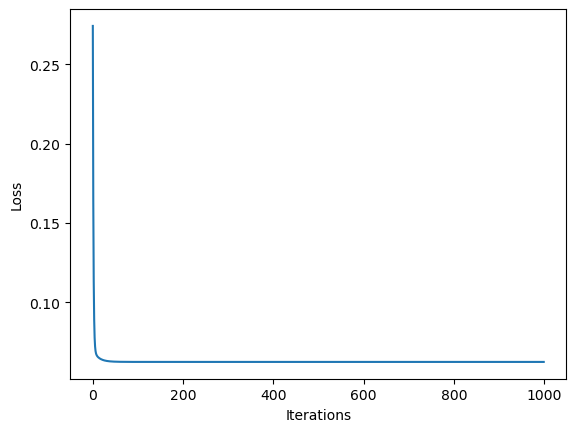

In [36]:
eta = 0.1
iterations = 1000
(m, n) = X_.shape
theta = np.random.rand(n, 1)

loss = []
for _ in range(iterations):
    Y_hat = X_.dot(theta)
    gradients = 2/m * X_.T.dot(Y_hat - Y)
    theta = theta - eta * gradients
    loss = np.append(loss, MSE(Y_hat, Y))

plt.plot(loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [31]:
Y_pred = linear_binary_classifier(X_, theta)
print(Y_pred.T)
print(Y.T)

[[0 1 1 1]]
[[0 1 1 1]]


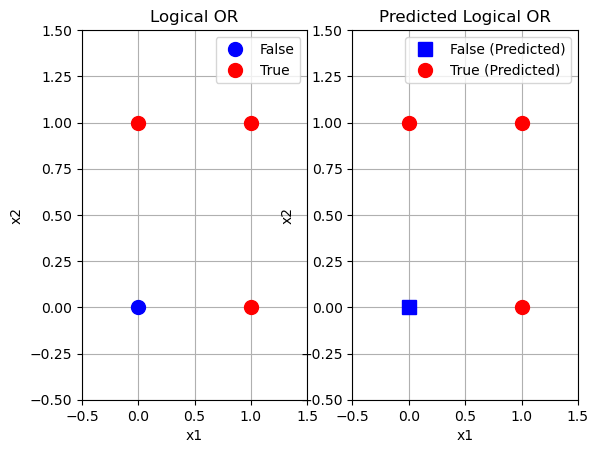

In [35]:
plt.subplot(1, 2, 1)
plt.title("Logical OR")
plt.plot(X[0, 0], X[0, 1], 'b.', markersize=20, label = "False")
plt.plot(X[1:, 0], X[1:, 1], 'r.', markersize=20, label = "True")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Predicted Logical OR")
plt.plot(X[Y_pred[:, 0] == 0][:, 0], X[Y_pred[:, 0] == 0][:, 1], 'bs', markersize=10, label='False (Predicted)')
plt.plot(X[Y_pred[:, 0] == 1][:, 0], X[Y_pred[:, 0] == 1][:, 1], 'ro', markersize=10, label='True (Predicted)')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

plt.show()